# 🚢 **TITANIC SURVIVAL PREDICTION - NEURAL NETWORK PROJECT**

**Francisco Teixeira Barbosa** | GitHub: [Tuminha](https://github.com/Tuminha) | Email: cisco@periospot.com

---

## 📋 **PROJECT OVERVIEW**

Following the success of my **Hotel Cancellation Predictor** (82.65% accuracy), I'm now tackling the classic Titanic survival prediction challenge using neural networks. This smaller dataset (891 passengers vs 119K hotel bookings) will help me reinforce deep learning concepts with faster iteration and clearer results.

### **🎯 Learning Objectives:**
- Master binary classification with PyTorch neural networks
- Practice feature engineering on historical data
- Implement proper train/test evaluation methodology
- Build production-ready ML pipeline

### **📊 Dataset Context:**
- **Source**: Kaggle Titanic Competition
- **Size**: 891 training samples
- **Target**: Predict passenger survival (1 = survived, 0 = died)
- **Expected Performance**: 80%+ accuracy

---


## 📚 **PHASE 1: DATA EXPLORATION**

### **🎯 Phase Objectives:**
Understand the Titanic dataset structure, identify missing values, and discover survival patterns that will guide our feature engineering and model design.

---


### **Task 1: Download and Load Titanic Dataset**

**Objective**: Obtain the Kaggle Titanic dataset and load it into our analysis environment.

**TODO**: Download the Titanic dataset from Kaggle and load it using pandas
- Research: What are the different ways to download Kaggle datasets?
- Hint: You can use the Kaggle API or download manually from the website
- Consider: Where should you save the dataset files?

**Business Context**: The Titanic dataset is a classic in ML education, representing a real historical event with clear survival outcomes. Understanding this context helps us interpret our model's predictions meaningfully.


In [ ]:
# Import necessary libraries
# TODO: Import pandas, numpy, and matplotlib/seaborn for data analysis
# Research: What other libraries might be useful for data exploration?
import pandas as pd
import numpy as np

# Load the Titanic dataset
# TODO: Read the train.csv file from your data directory
# Hint: Use pd.read_csv() and check the file path
# Research: What parameters can you use with read_csv()?
train_data = pd.read_csv("data/train.csv")


# Display basic information about the dataset
# TODO: Show the first few rows and basic dataset info
# Hint: Use .head() and .info() methods
# Research: What other methods help you understand dataset structure?
train_data.head()
train_data.info()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Load test data 
test_data = pd.read_csv("data/test.csv")
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **Task 2: Exploratory Data Analysis**

**Objective**: Understand the dataset structure, data types, and identify missing values.

**TODO**: Perform comprehensive EDA to understand the data
- Research: What information does .describe() provide for numerical vs categorical columns?
- Hint: Check data types, missing values, and basic statistics
- Consider: Which columns might be most important for survival prediction?

**Business Context**: Each passenger had different characteristics that influenced their survival chances. Understanding these patterns helps us build a better predictive model.


In [37]:
# Dataset shape and basic information
# TODO: Check the shape of the dataset
# Research: What does the shape tell us about our data?
train_data.shape

# Data types and missing values
# TODO: Use .info() to see data types and missing value counts
# TODO: Use .isnull().sum() to get detailed missing value information
# Research: Which columns have the most missing data?
train_data.info()
null_sum = train_data.isnull().sum()
questinable_features = []
for column in null_sum.index:
    if null_sum[column] == 0:
        print(f"Column '{column}' has 0 nulls")
    elif null_sum[column] > 0:
        questinable_features.append([column])
    else:
        print(f"Column '{column}' has {null_sum[column]} nulls")
print(f"Features {questinable_features} maybe are not a good features because they have some nulls")


# Basic statistics
# TODO: Use .describe() to see numerical column statistics
# Research: What insights can you draw from the statistical summary?
train_data.describe()
# Target variable analysis
# TODO: Check the distribution of the Survived column
# Research: What does this tell us about the class balance?
train_data.groupby("Survived").size()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Column 'PassengerId' has 0 nulls
Column 'Survived' has 0 nulls
Column 'Pclass' has 0 nulls
Column 'Name' has 0 nulls
Column 'Sex' has 0 nulls
Column 'SibSp' has 0 nulls
Column 'Parch' has 0 nulls
Column 'Ticket' has 0 nulls
Column 'Fare' has 0 

Survived
0    549
1    342
dtype: int64

### **Task 3: Visualize Survival Patterns**

**Objective**: Create visualizations to understand which factors correlate with survival.

**TODO**: Create visualizations showing survival patterns by key features
- Research: What types of plots work best for categorical vs numerical features?
- Hint: Use seaborn for statistical visualizations
- Consider: How can you show survival rates by different passenger characteristics?

**Business Context**: Historical accounts mention "women and children first" - our visualizations should reveal if this pattern appears in the data.


Survival Statistics by Gender:
        count  sum      mean
Sex                         
female    314  233  0.742038
male      577  109  0.188908
Survival Statistics by Pclass:
        count  sum      mean
Pclass                      
1         216  136  0.629630
2         184   87  0.472826
3         491  119  0.242363


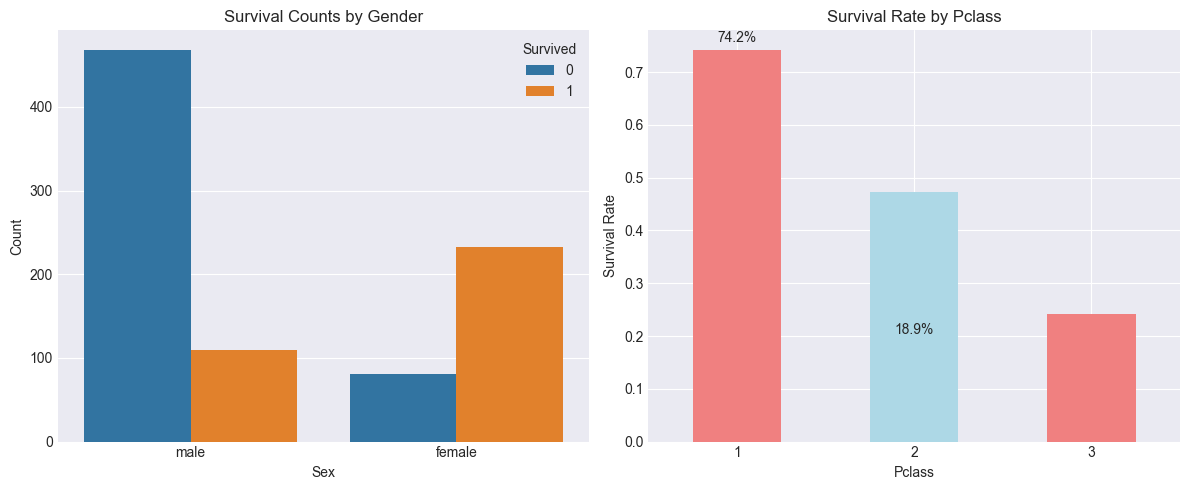

Age Statistics:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Missing age values: 177


/var/folders/cd/2c6x3jgj47j_fwl7231ts7m00000gn/T/ipykernel_98774/3659518536.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_age['Age'].fillna(train_data['Age'].median(), inplace=True)
/var/folders/cd/2c6x3jgj47j_fwl7231ts7m00000gn/T/ipykernel_98774/3659518536.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_ra

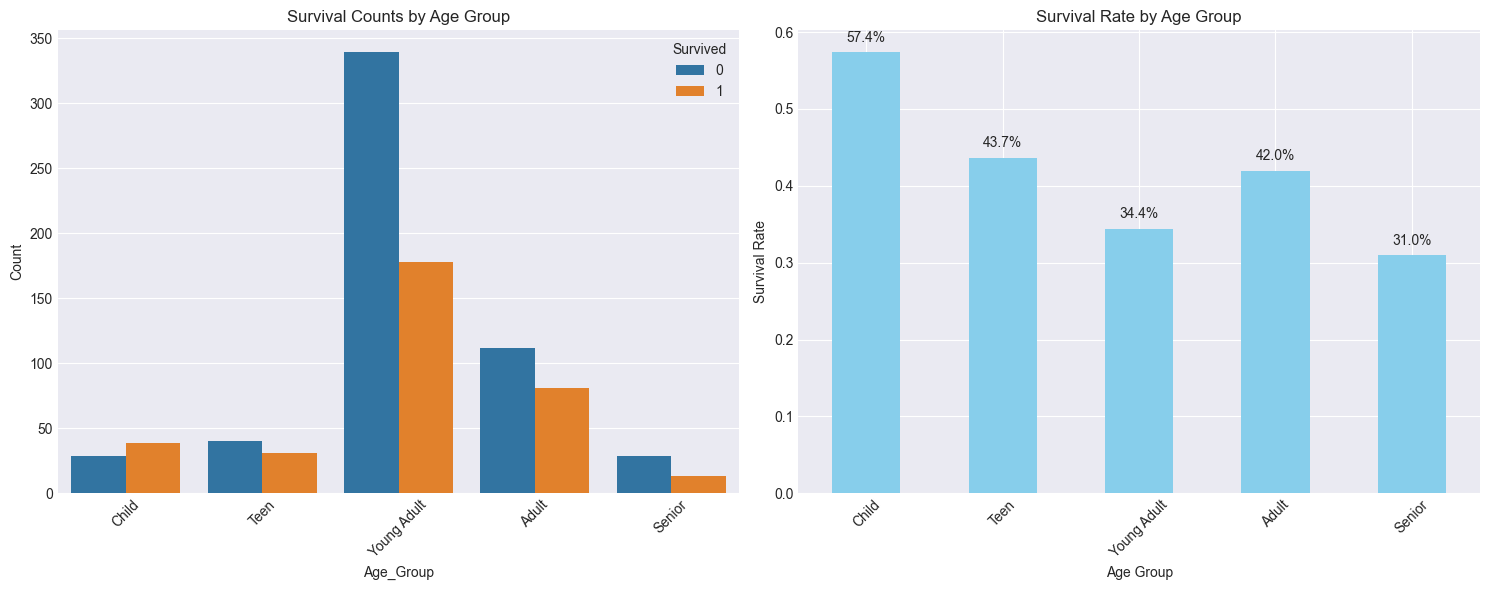


Survival Statistics by Age Group:
             count  sum      mean
Age_Group                        
Child           68   39  0.573529
Teen            71   31  0.436620
Young Adult    517  178  0.344294
Adult          193   81  0.419689
Senior          42   13  0.309524


/var/folders/cd/2c6x3jgj47j_fwl7231ts7m00000gn/T/ipykernel_98774/3659518536.py:100: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = train_data_age.groupby('Age_Group')['Survived'].agg(['count', 'sum', 'mean'])


In [51]:
# Import visualization libraries
# TODO: Import matplotlib and seaborn for plotting
# Research: What other visualization libraries might be useful?
import matplotlib as plt
import seaborn

# Set up plotting style
# TODO: Configure matplotlib for better-looking plots
# Hint: Use plt.style.use() or seaborn.set_style()
plt.style.use('seaborn-v0_8-darkgrid')

# Survival rate by gender
# TODO: Create a visualization showing survival rates by Sex
# Research: What's the best plot type for comparing categorical groups?
# Create survival rate by gender visualization
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(12, 5))

# Count plot showing survival counts by sex
seaborn.countplot(data=train_data, x='Sex', hue='Survived', ax=ax1)
ax1.set_title('Survival Counts by Gender')
ax1.set_ylabel('Count')

# Calculate and plot survival rates by sex
survival_rates = train_data.groupby('Sex')['Survived'].mean()
survival_rates.plot(kind='bar', ax=ax2, color=['lightcoral', 'lightblue'])
ax2.set_title('Survival Rate by Gender')
ax2.set_ylabel('Survival Rate')
ax2.set_xlabel('Gender')
ax2.tick_params(axis='x', rotation=0)

# Add percentage labels on bars
for i, v in enumerate(survival_rates.values):
    ax2.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')



# Print survival statistics by gender
print("Survival Statistics by Gender:")
print(train_data.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean']))

# Survival rate by passenger class
# TODO: Visualize survival patterns by Pclass
# Research: How can you show both counts and percentages?
print("Survival Statistics by Pclass:")
print(train_data.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean']))

survival_rates_by_class = train_data.groupby('Pclass')['Survived'].mean()
survival_rates_by_class.plot(kind='bar', ax=ax2, color=['lightcoral', 'lightblue'])
ax2.set_title('Survival Rate by Pclass')
ax2.set_ylabel('Survival Rate')
ax2.set_xlabel('Pclass')
ax2.tick_params(axis='x', rotation=0)

plt.pyplot.tight_layout()
plt.pyplot.show()

# Survival rate by age groups
# Create age groups and visualize survival patterns
# First, let's examine the age distribution
print("Age Statistics:")
print(train_data['Age'].describe())
print(f"\nMissing age values: {train_data['Age'].isnull().sum()}")

# Create age groups using pd.cut()
# Define age bins: Child (0-12), Teen (13-19), Young Adult (20-35), Adult (36-55), Senior (56+)
age_bins = [0, 12, 19, 35, 55, 100]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create age groups (handle missing values by filling with median first)
train_data_age = train_data.copy()
train_data_age['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data_age['Age_Group'] = pd.cut(train_data_age['Age'], bins=age_bins, labels=age_labels, right=False)

# Create visualization for age groups
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(15, 6))

# Count plot showing survival counts by age group
seaborn.countplot(data=train_data_age, x='Age_Group', hue='Survived', ax=ax1)
ax1.set_title('Survival Counts by Age Group')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Calculate and plot survival rates by age group
survival_rates_age = train_data_age.groupby('Age_Group')['Survived'].mean()
survival_rates_age.plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Survival Rate by Age Group')
ax2.set_ylabel('Survival Rate')
ax2.set_xlabel('Age Group')
ax2.tick_params(axis='x', rotation=45)

# Add percentage labels on bars
for i, v in enumerate(survival_rates_age.values):
    ax2.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')

plt.pyplot.tight_layout()
plt.pyplot.show()

# Print survival statistics by age group
print("\nSurvival Statistics by Age Group:")
age_stats = train_data_age.groupby('Age_Group')['Survived'].agg(['count', 'sum', 'mean'])
print(age_stats)

# Family size impact
# TODO: Create a family size feature and analyze its impact
# Research: How can you combine SibSp and Parch to create meaningful groups?


### **Task 4: Correlation Analysis and Feature Insights**

**Objective**: Analyze correlations between features and identify the most important predictors.

**TODO**: Perform correlation analysis and derive business insights
- Research: What's the difference between Pearson and Spearman correlation?
- Hint: Use correlation matrices and heatmaps
- Consider: Which features show the strongest relationship with survival?

**Business Context**: Understanding feature importance helps us focus our feature engineering efforts and build more interpretable models.


In [ ]:
# Correlation matrix
# TODO: Create a correlation matrix for numerical features
# Research: Which features should you include in the correlation analysis?
# Hint: Convert categorical variables to numerical first if needed

# Visualize correlations
# TODO: Create a heatmap of the correlation matrix
# Research: What parameters can you use to make heatmaps more readable?
# Hint: Use seaborn.heatmap() with appropriate parameters

# Feature importance analysis
# TODO: Calculate survival rates by different feature combinations
# Research: How can you quantify the predictive power of each feature?
# Hint: Consider using groupby() with multiple features

# Summary insights
# TODO: Document your key findings from Phase 1
# Research: What are the most important insights for feature engineering?
# Consider: Which features should we focus on in preprocessing?


## 📋 **PHASE 1 SUMMARY**

### **Key Findings:**
- [ ] **Dataset Structure**: Document shape, data types, and missing values
- [ ] **Survival Patterns**: Identify key factors that correlate with survival
- [ ] **Missing Data Strategy**: Plan how to handle missing values in Age, Cabin, Embarked
- [ ] **Feature Engineering Opportunities**: Identify new features to create

### **Next Steps for Phase 2:**
- [ ] Handle missing values intelligently
- [ ] Engineer new features (Title, Family Size, etc.)
- [ ] Encode categorical variables
- [ ] Scale features for neural network training

---

**🎯 Ready for Phase 2: Data Preprocessing!**
